<a href="https://colab.research.google.com/github/angomoson/pytorch/blob/main/human_activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [148]:
from google.colab import drive
import pandas as pd
import time
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier


In [149]:
# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [150]:
#Read Column name
column_name = pd.read_csv('/content/drive/MyDrive/UCI-HAR-Dataset/features.txt', header=None, sep=" ")
column_name = column_name.drop(column_name.columns[0], axis=1)
column_name = column_name.values.tolist()

In [151]:
column_name_list = [i[0] for i in column_name]
column_name_list

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X',
 'tBodyAcc-max()-Y',
 'tBodyAcc-max()-Z',
 'tBodyAcc-min()-X',
 'tBodyAcc-min()-Y',
 'tBodyAcc-min()-Z',
 'tBodyAcc-sma()',
 'tBodyAcc-energy()-X',
 'tBodyAcc-energy()-Y',
 'tBodyAcc-energy()-Z',
 'tBodyAcc-iqr()-X',
 'tBodyAcc-iqr()-Y',
 'tBodyAcc-iqr()-Z',
 'tBodyAcc-entropy()-X',
 'tBodyAcc-entropy()-Y',
 'tBodyAcc-entropy()-Z',
 'tBodyAcc-arCoeff()-X,1',
 'tBodyAcc-arCoeff()-X,2',
 'tBodyAcc-arCoeff()-X,3',
 'tBodyAcc-arCoeff()-X,4',
 'tBodyAcc-arCoeff()-Y,1',
 'tBodyAcc-arCoeff()-Y,2',
 'tBodyAcc-arCoeff()-Y,3',
 'tBodyAcc-arCoeff()-Y,4',
 'tBodyAcc-arCoeff()-Z,1',
 'tBodyAcc-arCoeff()-Z,2',
 'tBodyAcc-arCoeff()-Z,3',
 'tBodyAcc-arCoeff()-Z,4',
 'tBodyAcc-correlation()-X,Y',
 'tBodyAcc-correlation()-X,Z',
 'tBodyAcc-correlation()-Y,Z',
 'tGravityAcc-mean()-X',
 'tGravityA

In [152]:
# Path to the file in your Google Drive
X_train_path = '/content/drive/MyDrive/UCI-HAR-Dataset/train/X_train.csv'
# Read the file using Pandas
X_train = pd.read_csv(X_train_path, header=None, sep=" ")
X_train = X_train.drop(X_train.columns[0], axis=1)
X_train.columns = column_name_list

In [153]:
X_train

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.070157,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.165259,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.195034,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,0.013865,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339


In [154]:
# Path to the file in your Google Drive
Y_train_file_path = '/content/drive/MyDrive/UCI-HAR-Dataset/train/y_train.txt'
# Read the file using Pandas
Y_train = pd.read_csv(Y_train_file_path, header=None)
Y_train.columns = ["Activity_type"]

In [155]:
Y_train = np.ravel(Y_train)
Y_train

array([5, 5, 5, ..., 2, 2, 2])

In [156]:
# Path to the file in your Google Drive
X_test_file_path = '/content/drive/MyDrive/UCI-HAR-Dataset/test/X_test.csv'
# Read the file using Pandas
X_test = pd.read_csv(X_test_file_path, header=None, sep=" ")
X_test = X_test.drop(X_test.columns[0], axis=1)
X_test.columns = column_name_list

In [157]:
X_test

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.121711,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,0.074472,-0.376278,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784
2943,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,0.101859,-0.320418,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412
2944,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.066249,-0.118854,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184
2945,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.046467,-0.205445,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563


In [158]:
# Path to the file in your Google Drive
Y_test_file_path = '/content/drive/MyDrive/UCI-HAR-Dataset/test/y_test.txt'
# Read the file using Pandas
Y_test = pd.read_csv(Y_test_file_path, header=None)
Y_test.columns = ["Activity_type"]

In [159]:
Y_test

,Activity_type
0,5
1,5
2,5
3,5
4,5
...,...
2942,2
2943,2
2944,2
2945,2


## Create a database to plot/compare the results

In [160]:
TABLE = []
def insert_into_table(table, **kwargs):
  table.append(kwargs)

## Predicting without feature selection
1. ANN
2. RandomForest

In [161]:
def classify(model, x_train, y_train, x_test, y_test):
  if model == "ann":
    # Initialize MLPClassifier
    start_time = time.time()
    clf = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=1000, random_state=42)

    # Train the model
    clf.fit(x_train, y_train)

    # Predictions on the test set
    ann_y_pred = clf.predict(x_test)
    finish_time = time.time()

    # Evaluate accuracy
    accuracy = accuracy_score(y_test, ann_y_pred)

    return accuracy, finish_time - start_time

  else:
    # Initialize Random Forest Classifier
    start_time = time.time()
    clf = RandomForestClassifier(n_estimators=100, random_state=42)

    # Train the model
    clf.fit(x_train, y_train)

    # Predictions on the test set
    corr_random_forest_y_pred = clf.predict(x_test)
    finish_time = time.time()

    # Evaluate accuracy
    acccuracy = accuracy_score(y_test, corr_random_forest_y_pred)

    return acccuracy, finish_time - start_time


In [162]:
#Classify using ANN and RandomForest
ann = classify("ann", X_train, Y_train, X_test, Y_test)
rf = classify("rf", X_train, Y_train, X_test, Y_test)

# Add the information to the TABLE database
insert_into_table(TABLE, model_name="NoFeatureSelection", features_dropped=0, ann_accuracy=ann[0],ann_run_time=ann[1], rf_accuracy=rf[0],rf_run_time=rf[1])
print(TABLE)

[{'model_name': 'NoFeatureSelection', 'features_dropped': 0, 'ann_accuracy': 0.9457074991516796, 'ann_run_time': 16.73556637763977, 'rf_accuracy': 0.9256871394638616, 'rf_run_time': 12.991010189056396}]


## Feature selection methods
1. Appyling thrashold variance
2. Correlation
3. Information Gain
4. ANOVA

*The number of features selected are subject to the thresholds given.*

In [163]:
# Appyling thrashold variance
from sklearn.feature_selection import VarianceThreshold

In [164]:
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X_train)

VarianceThreshold(threshold=0)

In [165]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

## Result (variance threshold method):
*Since all the value turns out to be true there is no constant value in a particular feature.*

## 2. Feature selction using correlation matrix

<Axes: >

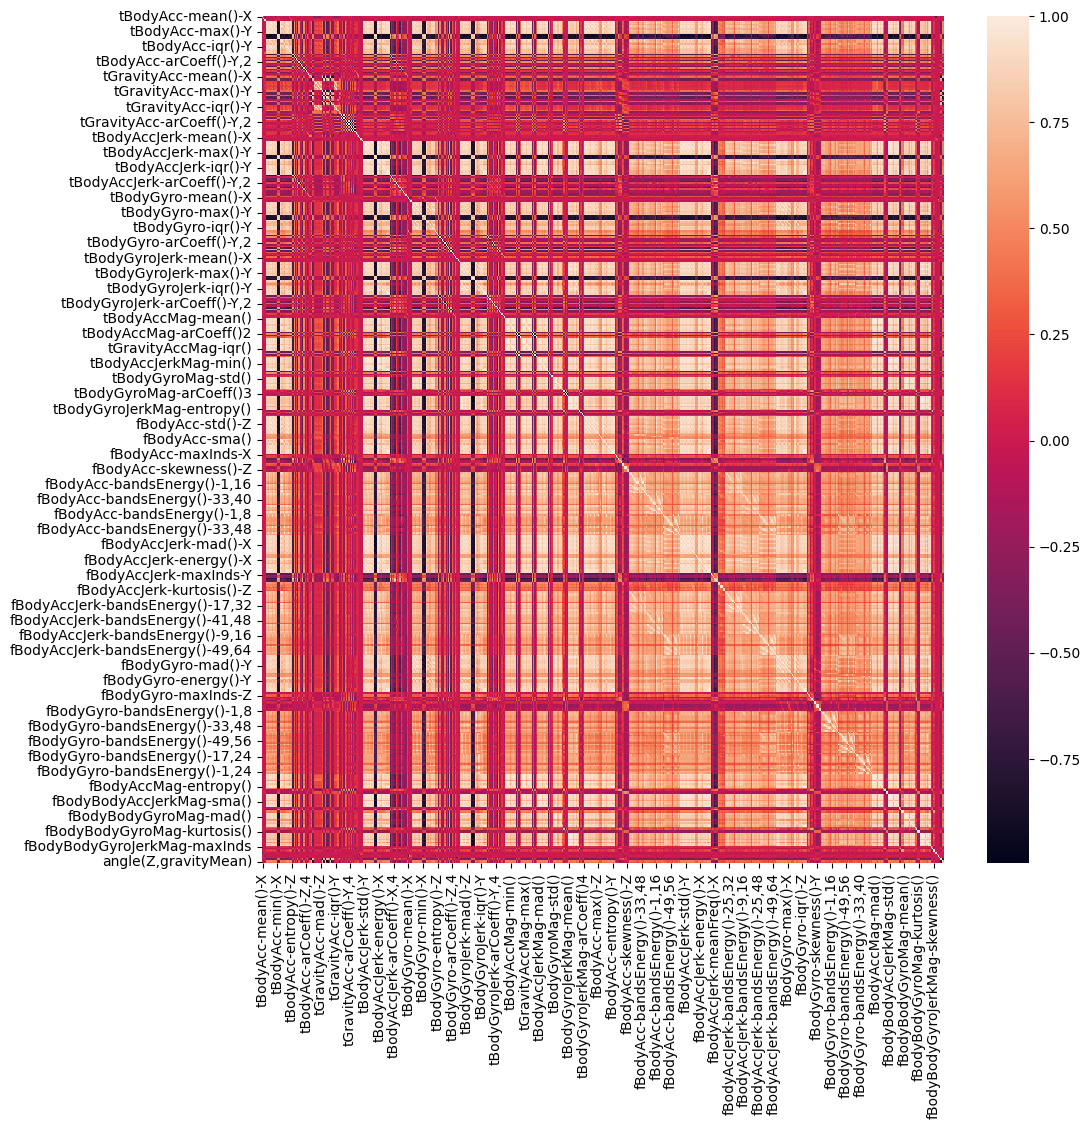

In [166]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#Using Pearson Correlation
corrmat = X_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corrmat)

In [167]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(df, threshold):
    # Calculate correlation matrix
    corr_matrix = df.corr().abs()

    # Select upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # Find index of feature columns with correlation greater than threshold
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    return to_drop

In [168]:
# using the correlation threshold of 0.9
corr_features = correlation(X_train, 0.9)
len(set(corr_features))

314

In [169]:
corr_features

['tBodyAcc-std()-Y',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X',
 'tBodyAcc-max()-Y',
 'tBodyAcc-max()-Z',
 'tBodyAcc-min()-X',
 'tBodyAcc-min()-Y',
 'tBodyAcc-min()-Z',
 'tBodyAcc-sma()',
 'tBodyAcc-energy()-X',
 'tBodyAcc-energy()-Y',
 'tBodyAcc-energy()-Z',
 'tBodyAcc-iqr()-X',
 'tBodyAcc-iqr()-Y',
 'tBodyAcc-iqr()-Z',
 'tGravityAcc-mad()-X',
 'tGravityAcc-mad()-Y',
 'tGravityAcc-mad()-Z',
 'tGravityAcc-max()-X',
 'tGravityAcc-max()-Y',
 'tGravityAcc-max()-Z',
 'tGravityAcc-min()-X',
 'tGravityAcc-min()-Y',
 'tGravityAcc-min()-Z',
 'tGravityAcc-energy()-X',
 'tGravityAcc-iqr()-X',
 'tGravityAcc-iqr()-Y',
 'tGravityAcc-iqr()-Z',
 'tGravityAcc-arCoeff()-X,2',
 'tGravityAcc-arCoeff()-X,3',
 'tGravityAcc-arCoeff()-X,4',
 'tGravityAcc-arCoeff()-Y,2',
 'tGravityAcc-arCoeff()-Y,3',
 'tGravityAcc-arCoeff()-Y,4',
 'tGravityAcc-arCoeff()-Z,2',
 'tGravityAcc-arCoeff()-Z,3',
 'tGravityAcc-arCoeff()-Z,4',
 'tBodyAccJerk-std()-X',
 'tBodyAccJerk-std()-Y',
 

In [170]:
# Removing the features which are highly corelated
corr_X_train = X_train.drop(corr_features,axis=1)
corr_X_test = X_test.drop(corr_features,axis=1)

In [171]:
corr_X_train

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2",...,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.913526,-0.407747,-0.679338,-0.602122,0.929294,-0.853011,...,-0.128989,0.586156,-0.991048,-1.000000,-0.074323,-0.298676,-0.112754,0.030400,-0.464761,-0.018446
1,0.278419,-0.016411,-0.123520,-0.998245,-0.960322,-0.714892,-0.500930,-0.570979,0.611627,-0.329549,...,-0.271958,-0.336310,-0.994440,-1.000000,0.158075,-0.595051,0.053477,-0.007435,-0.732626,0.703511
2,0.279653,-0.019467,-0.113462,-0.995380,-0.978944,-0.592235,-0.485821,-0.570979,0.273025,-0.086309,...,-0.212728,-0.535352,-0.995866,-0.555556,0.414503,-0.390748,-0.118559,0.177899,0.100699,0.808529
3,0.279174,-0.026201,-0.123283,-0.996091,-0.990675,-0.627446,-0.850930,-0.911872,0.061436,0.074840,...,-0.035684,-0.230091,-0.995732,-0.936508,0.404573,-0.117290,-0.036788,-0.012892,0.640011,-0.485366
4,0.276629,-0.016570,-0.115362,-0.998139,-0.990482,-0.786553,-0.559477,-0.761434,0.313276,-0.131208,...,-0.273582,-0.510282,-0.997418,-0.936508,0.087753,-0.351471,0.123320,0.122542,0.693578,-0.615971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.077078,0.195643,0.140158,-0.082077,-0.561607,0.426433,...,-0.376234,-0.170845,-0.925241,-0.904762,-0.070157,-0.588433,-0.190437,0.829718,0.206972,-0.425619
7348,0.273853,-0.007749,-0.147468,-0.235309,0.059280,0.178138,0.293566,-0.051532,-0.361660,0.149854,...,-0.296176,0.019626,-0.761880,-0.904762,0.165259,-0.390738,0.064907,0.875679,-0.879033,0.400219
7349,0.273387,-0.017011,-0.045022,-0.218218,0.274533,0.173131,0.276040,0.152003,-0.376773,0.200784,...,-0.320249,0.490169,-0.692582,-0.904762,0.195034,0.025145,0.052806,-0.266724,0.864404,0.701169
7350,0.289654,-0.018843,-0.158281,-0.219139,0.268893,0.160333,0.246561,0.021678,-0.475165,0.296546,...,-0.412332,0.308105,-0.886154,-0.904762,0.013865,0.063907,-0.101360,0.700740,0.936674,-0.589479


In [172]:
#Classify using ANN and RandomForest
ann = classify("ann", corr_X_train, Y_train, corr_X_test, Y_test)
rf = classify("rf", corr_X_train, Y_train, corr_X_test, Y_test)

# Add the information to the TABLE database
insert_into_table(TABLE, model_name="Correlation", features_dropped= len(corr_features), ann_accuracy=ann[0],ann_run_time=ann[1], rf_accuracy=rf[0],rf_run_time=rf[1])
print(TABLE)

[{'model_name': 'NoFeatureSelection', 'features_dropped': 0, 'ann_accuracy': 0.9457074991516796, 'ann_run_time': 16.73556637763977, 'rf_accuracy': 0.9256871394638616, 'rf_run_time': 12.991010189056396}, {'model_name': 'Correlation', 'features_dropped': 398, 'ann_accuracy': 0.9287410926365796, 'ann_run_time': 6.672478675842285, 'rf_accuracy': 0.9355276552426196, 'rf_run_time': 7.654764890670776}]


## Result (correlation method):
*Here the accuracy for the RandomForest is improved and decreased for ANN. However with reduced feature, both the model predicts much faster.*

### 3. Use Information Gain
* Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

In [173]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, Y_train)
mutual_info

array([0.3219096 , 0.20117962, 0.1710044 , 0.87460726, 0.68888217,
       0.6574396 , 0.8694079 , 0.68736386, 0.65798853, 1.00691476,
       0.78731861, 0.79237868, 0.87727697, 0.83383352, 0.80340948,
       0.76189554, 0.87572031, 0.6752018 , 0.63888295, 0.81667461,
       0.67533711, 0.64983996, 0.67068053, 0.59935967, 0.52604455,
       0.44261147, 0.24444221, 0.07803874, 0.07644821, 0.26598209,
       0.21121027, 0.04209793, 0.02878473, 0.2564111 , 0.21068489,
       0.04520599, 0.03708851, 0.31613029, 0.15834506, 0.22300409,
       0.65692623, 0.8565608 , 0.62395859, 0.42899728, 0.36008816,
       0.30600509, 0.40311141, 0.34937468, 0.29113539, 0.74451338,
       0.9283464 , 0.71520692, 0.82299466, 0.94421903, 0.75372188,
       0.28369541, 0.66001385, 0.63342973, 0.4443953 , 0.35003284,
       0.28170569, 0.24570314, 0.24572261, 0.24176035, 0.13667972,
       0.30541895, 0.32615748, 0.33579705, 0.34613061, 0.23830553,
       0.23359296, 0.2329256 , 0.21729842, 0.18746944, 0.20023

In [174]:
def info_gain_feature_selection(col_name, mutual_info, threshold):
  features_to_drop = []
  for i in range(len(mutual_info)):
    if mutual_info[i] < threshold:
      features_to_drop.append(col_name[i])

  return features_to_drop


In [175]:
less_info_feat = info_gain_feature_selection(column_name_list, mutual_info, 0.5)
print(len(less_info_feat))

194


In [176]:
# Removing the features which has low mutual info gain value
ig_X_train = X_train.drop(less_info_feat,axis=1)
ig_X_test = X_test.drop(less_info_feat,axis=1)

In [177]:
ig_X_train

,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,...,fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),"angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,...,-0.989941,-0.992448,-0.991048,-0.991990,-0.999937,-0.990458,-0.871306,-0.841247,0.179941,-0.058627
1,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,-0.557851,-0.818409,0.849308,...,-0.995442,-0.996866,-0.994440,-0.995854,-0.999981,-0.994544,-1.000000,-0.844788,0.180289,-0.054317
2,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,-0.557851,-0.818409,0.843609,...,-0.994640,-0.996060,-0.995866,-0.995031,-0.999973,-0.993755,-1.000000,-0.848933,0.180637,-0.049118
3,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,-0.576159,-0.829711,0.843609,...,-0.995722,-0.995273,-0.995732,-0.995221,-0.999974,-0.995226,-0.955696,-0.848649,0.181935,-0.047663
4,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,-0.569174,-0.824705,0.849095,...,-0.995279,-0.995609,-0.997418,-0.995093,-0.999974,-0.995487,-1.000000,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,0.029369,-0.076700,0.273480,...,-0.647418,-0.799450,-0.925241,-0.681097,-0.951092,-0.599074,0.310836,-0.791883,0.238604,0.049819
7348,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,0.029369,-0.031966,0.282174,...,-0.727039,-0.779350,-0.761880,-0.682756,-0.957032,-0.670062,0.207930,-0.771840,0.252676,0.050053
7349,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,-0.110405,0.055411,0.263175,...,-0.724976,-0.709270,-0.692582,-0.685851,-0.952309,-0.696373,0.158936,-0.779133,0.249145,0.040811
7350,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,-0.149495,0.055411,0.234850,...,-0.702221,-0.694807,-0.886154,-0.712131,-0.951972,-0.760044,0.210070,-0.785181,0.246432,0.025339


In [178]:
#Classify using ANN and RandomForest
ann = classify("ann", ig_X_train, Y_train, ig_X_test, Y_test)
rf = classify("rf", ig_X_train, Y_train, ig_X_test, Y_test)

# Add the information to the TABLE database
insert_into_table(TABLE, model_name="Information_Gain", features_dropped= len(less_info_feat), ann_accuracy=ann[0],ann_run_time=ann[1], rf_accuracy=rf[0],rf_run_time=rf[1])
print(TABLE)

[{'model_name': 'NoFeatureSelection', 'features_dropped': 0, 'ann_accuracy': 0.9457074991516796, 'ann_run_time': 16.73556637763977, 'rf_accuracy': 0.9256871394638616, 'rf_run_time': 12.991010189056396}, {'model_name': 'Correlation', 'features_dropped': 398, 'ann_accuracy': 0.9287410926365796, 'ann_run_time': 6.672478675842285, 'rf_accuracy': 0.9355276552426196, 'rf_run_time': 7.654764890670776}, {'model_name': 'Information_Gain', 'features_dropped': 194, 'ann_accuracy': 0.9426535459789617, 'ann_run_time': 13.596338510513306, 'rf_accuracy': 0.9121140142517815, 'rf_run_time': 10.07209062576294}]


### Result (Mutual Information gain method)

### 3. ANOVA F-Test

In [179]:
from sklearn.feature_selection import f_classif

# Compute ANOVA F-value and p-value for each feature
f_values, p_values = f_classif(X_train, Y_train)

# Create DataFrame to store F-values and p-values
anova_df = pd.DataFrame({'Feature': X_train.columns, 'F-Value': f_values, 'P-Value': p_values})

# Display the DataFrame
print(anova_df)


                                  Feature       F-Value       P-Value
0                       tBodyAcc-mean()-X     17.626910  2.115464e-17
1                       tBodyAcc-mean()-Y     15.934803  1.197812e-15
2                       tBodyAcc-mean()-Z     10.397485  5.887505e-10
3                        tBodyAcc-std()-X  18213.463107  0.000000e+00
4                        tBodyAcc-std()-Y  12039.743636  0.000000e+00
..                                    ...           ...           ...
556      angle(tBodyGyroMean,gravityMean)     33.295215  1.009210e-33
557  angle(tBodyGyroJerkMean,gravityMean)      7.431867  5.790388e-07
558                  angle(X,gravityMean)  18109.846403  0.000000e+00
559                  angle(Y,gravityMean)   4563.995989  0.000000e+00
560                  angle(Z,gravityMean)   1582.243676  0.000000e+00

[561 rows x 3 columns]


In [180]:
# Define significance level
alpha = 0.05

# Filter DataFrame to include only significant features
significant_features = anova_df[anova_df['P-Value'] < alpha]

# Display the significant features
print(significant_features)


                                  Feature       F-Value       P-Value
0                       tBodyAcc-mean()-X     17.626910  2.115464e-17
1                       tBodyAcc-mean()-Y     15.934803  1.197812e-15
2                       tBodyAcc-mean()-Z     10.397485  5.887505e-10
3                        tBodyAcc-std()-X  18213.463107  0.000000e+00
4                        tBodyAcc-std()-Y  12039.743636  0.000000e+00
..                                    ...           ...           ...
556      angle(tBodyGyroMean,gravityMean)     33.295215  1.009210e-33
557  angle(tBodyGyroJerkMean,gravityMean)      7.431867  5.790388e-07
558                  angle(X,gravityMean)  18109.846403  0.000000e+00
559                  angle(Y,gravityMean)   4563.995989  0.000000e+00
560                  angle(Z,gravityMean)   1582.243676  0.000000e+00

[555 rows x 3 columns]


In [181]:
anova_col_name = significant_features["Feature"].values.tolist()

anova_to_drop = [col for col in X_train.columns if col not in anova_col_name]

# Drop features not included in selected_features from the DataFrame
anova_X_train = X_train.drop(columns=anova_to_drop)
anova_X_test = X_test.drop(columns=anova_to_drop)

In [182]:
anova_X_train

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-1.000000,-0.074323,-0.298676,-0.710304,-0.112754,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-1.000000,0.158075,-0.595051,-0.861499,0.053477,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.555556,0.414503,-0.390748,-0.760104,-0.118559,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.936508,0.404573,-0.117290,-0.482845,-0.036788,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.936508,0.087753,-0.351471,-0.699205,0.123320,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.904762,-0.070157,-0.588433,-0.880324,-0.190437,0.206972,-0.425619,-0.791883,0.238604,0.049819
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,-0.904762,0.165259,-0.390738,-0.680744,0.064907,-0.879033,0.400219,-0.771840,0.252676,0.050053
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,-0.904762,0.195034,0.025145,-0.304029,0.052806,0.864404,0.701169,-0.779133,0.249145,0.040811
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,-0.904762,0.013865,0.063907,-0.344314,-0.101360,0.936674,-0.589479,-0.785181,0.246432,0.025339


In [183]:
#Classify using ANN and RandomForest
ann = classify("ann", ig_X_train, Y_train, ig_X_test, Y_test)
rf = classify("rf", ig_X_train, Y_train, ig_X_test, Y_test)

# Add the information to the TABLE database
insert_into_table(TABLE, model_name="ANOVA", features_dropped= len(anova_to_drop), ann_accuracy=ann[0],ann_run_time=ann[1], rf_accuracy=rf[0],rf_run_time=rf[1])
print(TABLE)

[{'model_name': 'NoFeatureSelection', 'features_dropped': 0, 'ann_accuracy': 0.9457074991516796, 'ann_run_time': 16.73556637763977, 'rf_accuracy': 0.9256871394638616, 'rf_run_time': 12.991010189056396}, {'model_name': 'Correlation', 'features_dropped': 398, 'ann_accuracy': 0.9287410926365796, 'ann_run_time': 6.672478675842285, 'rf_accuracy': 0.9355276552426196, 'rf_run_time': 7.654764890670776}, {'model_name': 'Information_Gain', 'features_dropped': 194, 'ann_accuracy': 0.9426535459789617, 'ann_run_time': 13.596338510513306, 'rf_accuracy': 0.9121140142517815, 'rf_run_time': 10.07209062576294}, {'model_name': 'ANOVA', 'features_dropped': 6, 'ann_accuracy': 0.9426535459789617, 'ann_run_time': 12.430052995681763, 'rf_accuracy': 0.9121140142517815, 'rf_run_time': 9.138826608657837}]


## Display the information

In [184]:
from tabulate import tabulate

In [185]:
print(tabulate(TABLE, headers="keys", tablefmt="grid"))

+--------------------+--------------------+----------------+----------------+---------------+---------------+
| model_name         |   features_dropped |   ann_accuracy |   ann_run_time |   rf_accuracy |   rf_run_time |
+====================+====================+================+================+===============+===============+
| NoFeatureSelection |                  0 |       0.945707 |       16.7356  |      0.925687 |      12.991   |
+--------------------+--------------------+----------------+----------------+---------------+---------------+
| Correlation        |                398 |       0.928741 |        6.67248 |      0.935528 |       7.65476 |
+--------------------+--------------------+----------------+----------------+---------------+---------------+
| Information_Gain   |                194 |       0.942654 |       13.5963  |      0.912114 |      10.0721  |
+--------------------+--------------------+----------------+----------------+---------------+---------------+
| ANOVA   